In [42]:
# Importing data preprocessing lib
import pandas as pd

In [43]:
!pip install mysql-connector-python

In [94]:
# Import mysql connector and stablish connection
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="parents@0910"
    
)

print(mydb)

In [95]:
# Print the databases (list of databses)
mycursor = mydb.cursor()

mycursor.execute("show databases")
myresult = mycursor.fetchall()

for x in myresult:
    print(x)


('healthcare',)
('healthcare0',)
('healthcare1',)
('healthcare2',)
('healthcare7',)
('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


In [57]:
# Create new database

mycursor.execute("CREATE DATABASE healthcare7")


In [58]:
# Use new database

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="parents@0910",
    database="healthcare7"
)

mycursor = mydb.cursor()


In [59]:
# Create new table groups

mycursor.execute("""CREATE TABLE groups_tble (grp_sk int NOT NULL UNIQUE AUTO_INCREMENT,grp_id VARCHAR(6) NOT NULL PRIMARY KEY,
                 grp_name VARCHAR(90),premium_written int NOT NULL,city VARCHAR(20),
                 zip_code int,country VARCHAR(5),grp_type VARCHAR(10))""")


In [60]:
# Create new table subgroup
mycursor.execute("""CREATE TABLE subgroup (subgrp_sk int NOT NULL UNIQUE AUTO_INCREMENT,subgrp_id VARCHAR(4) NOT NULL PRIMARY KEY,
                 subgrp_name VARCHAR(90),monthly_premium float(6,2))""")


In [61]:
# Create new table group_subgroup
mycursor.execute("""CREATE TABLE group_subgroup (grpsub_sk int NOT NULL UNIQUE AUTO_INCREMENT,
                    g_id VARCHAR(6) NOT NULL,
                    s_id VARCHAR(4) NOT NULL,
                    FOREIGN KEY(g_id) REFERENCES groups_tble(grp_id),
                    FOREIGN KEY(s_id) REFERENCES subgroup(subgrp_id))""")


In [62]:
# Create new table disease
mycursor.execute("""CREATE TABLE disease (disease_id int NOT NULL PRIMARY KEY ,disease_name VARCHAR(30) NOT NULL ,
                 subgrp_id VARCHAR(4),FOREIGN KEY(subgrp_id) REFERENCES subgroup(subgrp_id))""")


In [63]:
# Create new table subscriber
mycursor.execute("""CREATE TABLE subscriber (sub_id VARCHAR(10) NOT NULL PRIMARY KEY ,first_name VARCHAR(30) ,
                 last_name VARCHAR(20),street VARCHAR(30),birth_date DATE,gender VARCHAR(6),phone VARCHAR(15),city VARCHAR(30),
                 zip_code int,country VARCHAR(10),subgrp_id VARCHAR(4),elig_ind VARCHAR(2) NOT NULL,eff_date DATE NOT NULL,term_date DATE,FOREIGN KEY(subgrp_id) REFERENCES subgroup(subgrp_id))""")



In [64]:
# create new table hospital_details
mycursor.execute("""CREATE TABLE hospital_details (hospital_id VARCHAR(5) NOT NULL PRIMARY KEY ,hospital_name VARCHAR(255),
                 city VARCHAR(20),state VARCHAR(20),country VARCHAR(6))""")


In [65]:
# Create new table patient_details
mycursor.execute("""CREATE TABLE patient_details(patient_id int NOT NULL PRIMARY KEY,patient_name VARCHAR(20),patient_gender VARCHAR(6),patient_birth_date DATE,patient_phone VARCHAR(15),disease_name VARCHAR(30),city VARCHAR(30),hospital_id VARCHAR(5),FOREIGN KEY(hospital_id) REFERENCES hospital_details(hospital_id))""")


In [66]:
# Create new table claims
mycursor.execute("""CREATE TABLE claims (claim_id int NOT NULL AUTO_INCREMENT PRIMARY KEY ,patient_id int NOT NULL,disease_name VARCHAR(20),
                 sub_id VARCHAR(10),claim_or_rejected VARCHAR(5),claim_type VARCHAR(20),claim_amount float(8,2),claim_date DATE,FOREIGN KEY(sub_id) REFERENCES subscriber(sub_id),FOREIGN KEY(patient_id) REFERENCES patient_details(patient_id))""")


In [76]:
#inserting data into table group 
with open('group_cleaned.csv','r') as file:
    mycursor.execute('''use healthcare''')
    data=file.readlines()
    for row in data:
            list=row.split(",")
            top=tuple([list[0],int(list[1]),int(list[2]),list[3],list[4],list[5],list[6]])
            print(top) 
            sql = "INSERT INTO healthcare7.groups_tble(country,premium_written,zip_code,grp_id,grp_name,grp_type,city) VALUES(%s,%s,%s,%s,%s,%s,%s)"
            mycursor.execute(sql, top)
            mydb.commit()

('0', 1, 2, '3', '4', '5', '6')
('India', 72000, 482018, 'GRP101', 'Life Insurance Corporation of India', 'Govt.', 'Mumbai')
('India', 45000, 482049, 'GRP102', 'HDFC Standard Life Insurance Co. Ltd.', 'Private', 'Mumbai')
('India', 64000, 482030, 'GRP103', 'Max Life Insurance Co. Ltd.', 'Private', 'Delhi')
('India', 59000, 482028, 'GRP104', 'ICICI Prudential Life Insurance Co. Ltd.', 'Private', 'Mumbai')
('India', 37000, 482014, 'GRP105', 'Kotak Mahindra Life Insurance Co. Ltd.', 'Private', 'Mumbai')
('India', 89000, 482011, 'GRP106', 'Aditya Birla Sun Life Insurance Co. Ltd.', 'Private', 'Mumbai')
('India', 70000, 482006, 'GRP107', 'TATA AIG Life Insurance Co. Ltd.', 'Private', 'Mumbai')
('India', 52000, 482034, 'GRP108', 'SBI Life Insurance Co. Ltd.', 'Private', 'Mumbai')
('India', 78000, 482032, 'GRP109', 'Exide Life Insurance Co. Ltd.', 'Private', 'Bangalore')
('India', 48000, 482015, 'GRP110', 'Bajaj Allianz Life Insurance Co. Ltd.', 'Private', 'Pune')
('India', 57000, 482011, 'GR

In [73]:
#insert data into subgroup
with open('subgroup_cleaned.csv','r') as file:
    mycursor.execute('''use healthcare''')
    data=file.readlines()
    for row in data:
        list=row.split(",")
        top=tuple([list[0],list[1],float(list[2])])
        print(top) 
        sql = "INSERT INTO healthcare7.subgroup(subgrp_id,subgrp_name,monthly_premium) VALUES(%s,%s,%s)"
        mycursor.execute(sql, top)
        mydb.commit()

('0', '1', 2.0)
('S101', 'Deficiency Diseases', 3000.0)
('S102', 'Accident', 1000.0)
('S103', 'Physiology', 2000.0)
('S104', 'Therapy', 1500.0)
('S105', 'Allergies', 2300.0)
('S106', 'Self inflicted', 1200.0)
('S107', 'Cancer', 3200.0)
('S108', 'Infectious disease', 1500.0)
('S109', 'Hereditary', 2000.0)
('S110', 'Viral', 1000.0)


In [77]:
#inserting data into hospital_details
with open('hospital.csv','r') as file:
    mycursor.execute('''use healthcare''')
    data=file.readlines()
    for row in data:
        list=row.split(",")
        top=tuple(list)
        print(top)
        sql = "INSERT INTO healthcare7.hospital_details(hospital_id,hospital_name,city,state,country) VALUES(%s,%s,%s,%s,%s)"
        mycursor.execute(sql,top)
        mydb.commit()


('H1000', 'All India Institute of Medical Sciences', 'New Delhi', 'Na', 'India\n')
('H1001', 'Medanta The Medicity', 'Gurgaon', 'Haryana', 'India\n')
('H1002', 'The Christian Medical College', 'Vellore', 'Tamil Nadu', 'India\n')
('H1003', 'PGIMER - Postgraduate Institute of Medical Education and Research', 'Chandigarh', 'Haryana', 'India\n')
('H1004', 'Apollo Hospital - Chennai', 'Chennai', 'Tamil Nadu', 'India\n')
('H1005', 'P. D. Hinduja National Hospital & Medical Research Centre', 'Mumbai', 'Maharashtra', 'India\n')
('H1006', 'Breach Candy Hospital', 'Mumbai', 'Maharashtra', 'India\n')
('H1007', 'Fortis Flt. Lt. Rajan Dhall Hospital', 'New Delhi', 'Na', 'India\n')
('H1008', 'King Edward Memorial Hospital', 'Mumbai', 'Maharashtra', 'India\n')
('H1009', 'Indraprastha Apollo Hospital', 'Delhi', 'Na', 'India\n')
('H1010', 'Lilavati Hospital And Research Centre', 'Mumbai', 'Maharashtra', 'India\n')
('H1011', 'Sir Ganga Ram Hospital', 'Delhi', 'Na', 'India\n')
('H1012', 'Bombay Hospital 

In [74]:
# insert data into table disease
with open('disease.csv','r') as file:
    mycursor.execute('''use healthcare''')
    data=file.readlines()
    for row in data:
            list=row.split(",")
            top=tuple([list[0],int(list[1]),list[2]])
            print(top) 
            sql = "INSERT INTO healthcare7.disease(subgrp_id,disease_id,disease_name) VALUES(%s,%s,%s)"
            mycursor.execute(sql, top)
            mydb.commit()

('S101', 110001, 'Beriberi\n')
('S101', 110002, 'Scurvy\n')
('S101', 110003, 'Goitre\n')
('S101', 110004, 'Osteoporosis\n')
('S101', 110005, 'Rickets\n')
('S101', 110006, 'Anaemia\n')
('S102', 110007, 'Fractures\n')
('S102', 110008, 'Heart Attack\n')
('S102', 110009, 'Burns\n')
('S102', 110010, 'Choking\n')
('S102', 110011, 'Stroke\n')
('S102', 110012, 'Food Poisoning\n')
('S103', 110013, 'Asthma\n')
('S103', 110014, 'Glaucoma\n')
('S103', 110015, 'Diabetes\n')
('S103', 110016, 'Amnesia\n')
('S103', 110017, 'Parasomnias\n')
('S103', 110018, 'Neurocognitive disorders\n')
('S104', 110019, 'Vertigo\n')
('S104', 110020, 'Lymphedema\n')
('S104', 110021, 'Concussion\n')
('S104', 110022, 'Arthritis\n')
('S104', 110023, 'Whiplash\n')
('S104', 110024, "Parkinson's disease\n")
('S105', 110025, 'Insecy allergy\n')
('S105', 110026, 'Mold allergy\n')
('S105', 110027, 'Pet allergy\n')
('S105', 110028, 'Pollen allergy\n')
('S105', 110029, 'Drug allergy\n')
('S105', 110030, 'Food allergy\n')
('S106', 

In [22]:
mydb.close()

In [80]:
df=pd.read_csv('query4.csv')


In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


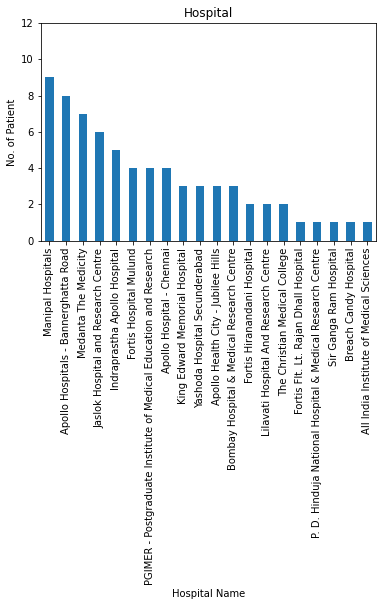

In [82]:
df.plot(x='hospital_name',y='total_patient',kind='bar',legend=None)
plt.title("Hospital")
plt.ylabel('No. of Patient')
plt.xlabel("Hospital Name")
plt.ylim(ymin=0,ymax=12)
plt.savefig('Hospital with most patient.png',bbox_inches='tight')

In [83]:
## Find out which subgroups subscribe most number of times

df1=pd.read_csv('query5.csv')


In [84]:
df1

,Unnamed: 0,subgrp_name,cunt
0,0,Therapy,14
1,1,Deficiency Diseases,11
2,2,Viral,11
3,3,Hereditary,11
4,4,Physiology,10
5,5,Allergies,10
6,6,Accident,10
7,7,Cancer,9
8,8,Self inflicted,7
9,9,Infectious disease,7


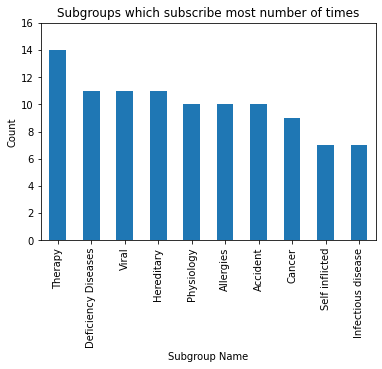

In [85]:
df1.plot(x='subgrp_name',y='cunt',kind='bar',legend=None)
plt.title("Subgroups which subscribe most number of times")
plt.ylabel('Count')
plt.xlabel("Subgroup Name")
plt.ylim(ymin=0,ymax=16)
plt.savefig('Subgroups which subscribe most number of times',bbox_inches='tight')


In [86]:
# Average monthly premium subscriber pay to insurance company subgroup.

df2=pd.read_csv('query10.csv')


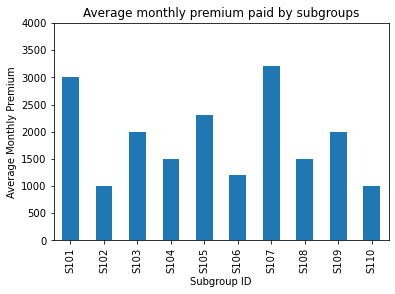

In [87]:
df2.plot(x='subgrp_id',y='avg(monthly_premium)',kind='bar',legend=None)
plt.title("Average monthly premium paid by subgroups")
plt.ylabel('Average Monthly Premium')
plt.xlabel("Subgroup ID")
plt.ylim(ymin=0,ymax=4000)
plt.savefig('Average Monthly Premium Paid by Subgroups',bbox_inches='tight')


In [88]:
# Find out Which group is most profitable

df3=pd.read_csv('query11.csv')



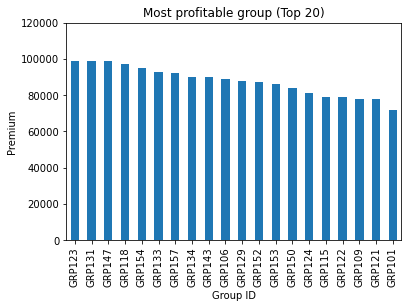

In [89]:
df3.head(n=20).plot(x='grp_id',y='premium_written',kind='bar',legend=None)
plt.title("Most profitable group (Top 20)")
plt.xlabel("Group ID")
plt.ylabel("Premium")
plt.ylim(ymin=0,ymax=120000)
plt.savefig('Most Profitable Groups',bbox_inches='tight')



In [90]:
# Show all the Databases of Hive
df = spark.sql("show databases").show()



+---------+
|namespace|
+---------+
|  default|
+---------+



In [37]:
!pip install pyspark

  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=0f92989dc63344344a69809881d40f4124ec8234e005b137f19bc5684b488bf7
  Stored in directory: c:\users\megha\appdata\local\pip\cache\wheels\51\c8\18\298a4ced8ebb3ab8a7d26a7198c0cc7035abb906bde94a4c4b
Successfully built pyspark


In [39]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [96]:
from pyspark.sql import Row
appName= "Python spark"
master= "local"